# Physics-based models (3): Doyle-Fuller-Newman model and Single Particle Model

In this notebook we want to compare the Doyle-Fuller-Newman model and the Single Particle Model (with and without electrolyte). We start by importing PyBaMM, as usual, and defining the list of models we want to compare.

In [1]:
%pip install pybamm==23.5 -q
import pybamm

models = [
    pybamm.lithium_ion.SPM(name="SPM"),
    pybamm.lithium_ion.SPMe(name="SPMe"),
    pybamm.lithium_ion.DFN(name="DFN"),
]


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Then, we can simply iterate over the list and solve the models.

In [2]:
solutions = []

for model in models:
    sim = pybamm.Simulation(model)
    sim.solve([0, 3600])
    solutions.append(sim.solution)

Because we appended the solution of each model to a list, we can now simply use `pybamm.dynamic_plot` to plot all the solutions together.

interactive(children=(FloatSlider(value=0.0, description='t', max=3600.0, step=36.0), Output()), _dom_classes=…

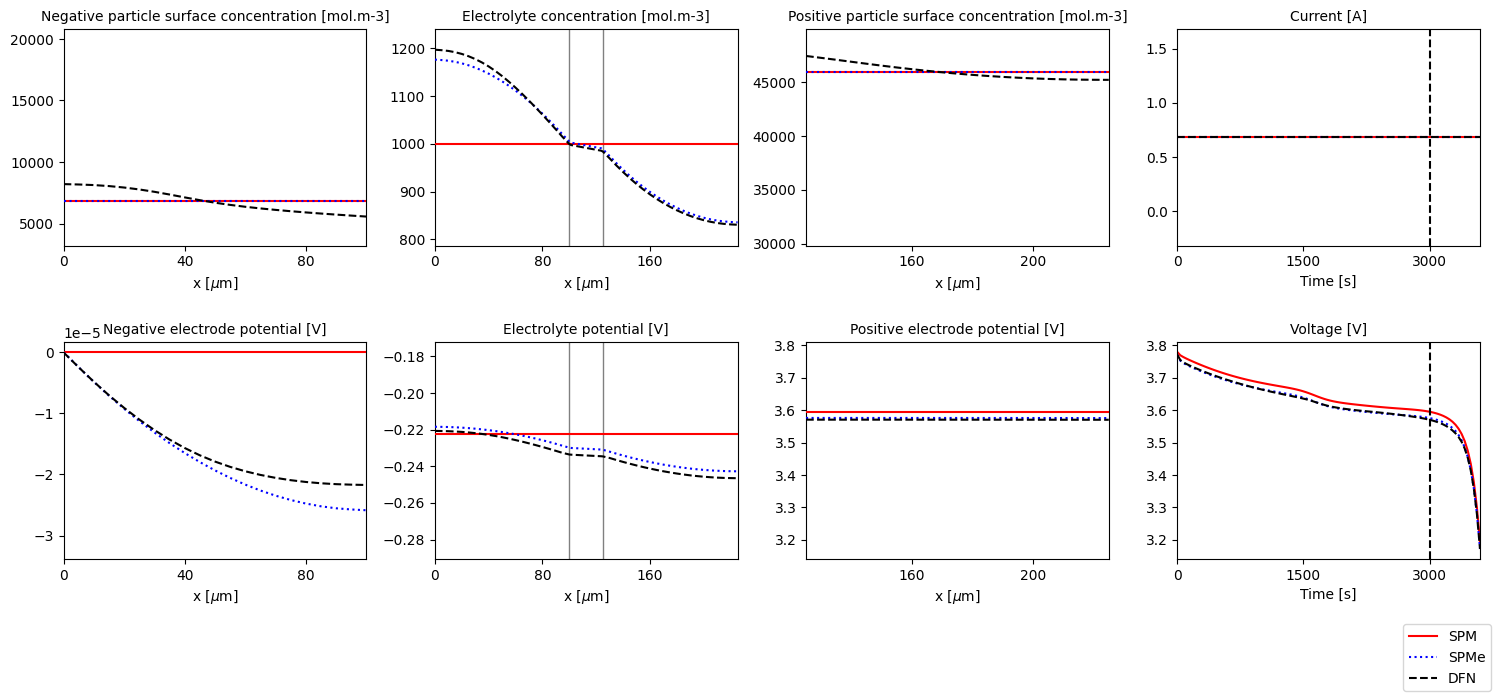

In [ ]:
plot = pybamm.dynamic_plot(solutions, time_unit="seconds")

# uncomment below to save the figure
# plot.plot(3000)
# plot.fig.savefig("model_comparison_1C.png", dpi=300)

In terms of voltage, we observe a very good agreement between DFN and SPMe and some discrepancy between these two and the SPM (by SPM we mean no electrolyte dynamics). Comparing the other variables, like electrolyte concentration, we observe small discrepancies between DFN and SPMe. 

The agreement between both SPM and SPMe, compared to DFN, gets worse as the current increases. We can repeat the simulation but now for a 3C discharge to see the differences better.

At t = 226.189, , mxstep steps taken before reaching tout.
At t = 226.189 and h = 1.32287e-14, the corrector convergence failed repeatedly or with |h| = hmin.


interactive(children=(FloatSlider(value=0.0, description='t', max=1144.683572552748, step=11.44683572552748), …

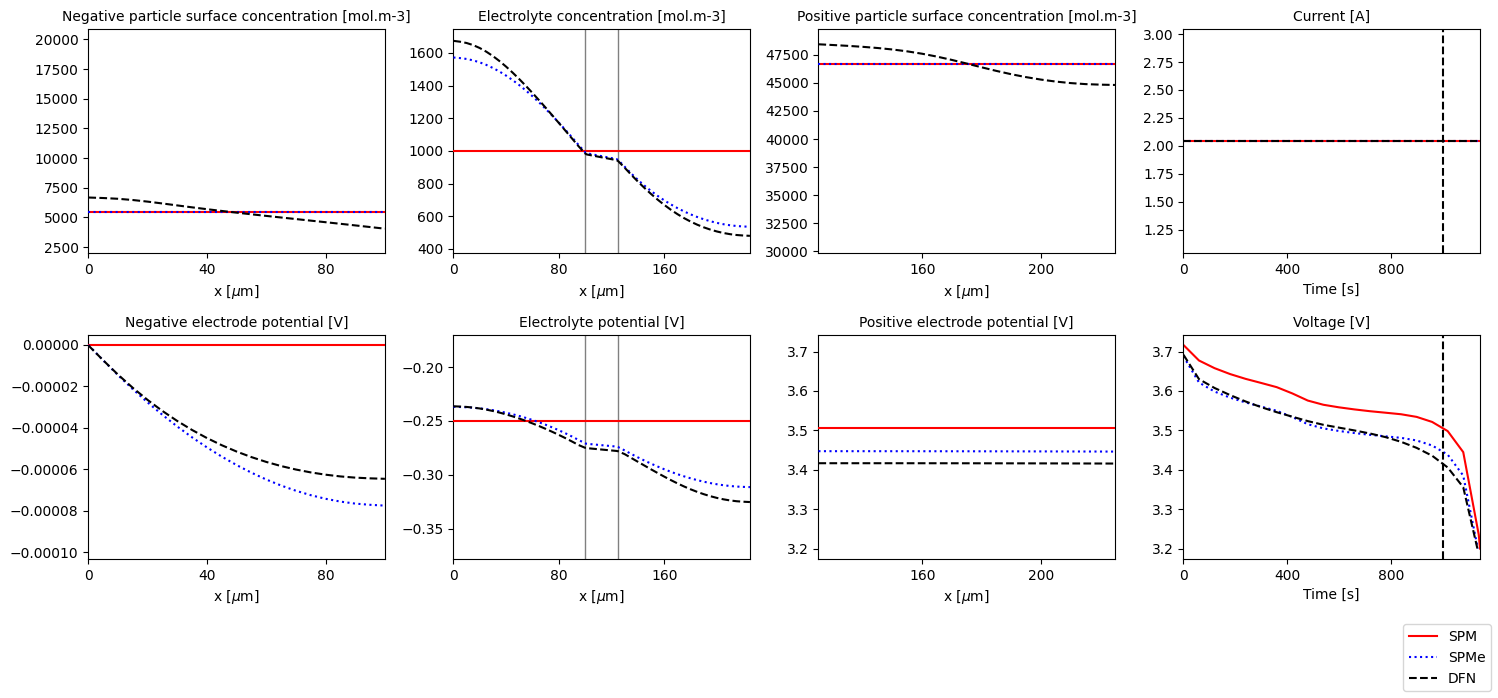

In [ ]:
experiment = "Discharge at 3C until 3.2 V"
solutions = []

for model in models:
    sim = pybamm.Simulation(model, experiment=experiment)
    sim.solve()
    solutions.append(sim.solution)

plot = pybamm.dynamic_plot(solutions)

# uncomment below to save the figure
# plot.plot(1000)
# plot.fig.savefig("model_comparison_3C.png", dpi=300)

Now we observe that the agreement DFN and SPMe is a bit worse, but it is still much better than the agreement between both and SPM. To understand why, we can check the voltage components, which can be plotted by `pybamm.plot_voltage_components`.

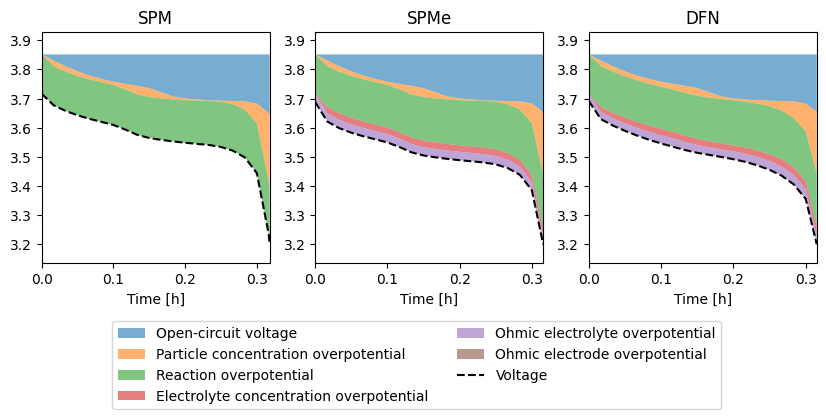

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for i, (ax, solution, model) in enumerate(zip(axes, solutions, models)):
    pybamm.plot_voltage_components(solution, ax=ax, show_legend=False)
    ax.set_title(model.name)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=2)

# uncomment below to save the figure
# plt.savefig("voltage_components.png", dpi=300, bbox_inches = "tight")

The plots above show, for each model, the contribution of various phenomena to the final voltage curve (black dashed). We can observe that the main cause for the discrepancy between SPM and SPMe/DFN is that the former does not include the electrolyte overpotentials (concentration and Ohmic). It does not include the Ohmic electrode overpotential, but its contribution is quite small even for DFN and SPMe.

We can also compare the time taken to solve each model, which is recorded automatically by PyBaMM.

In [ ]:
print("Solve times:")
for model, solution in zip(models, solutions):
    print(model.name + ":", solution.solve_time)

Solve times:
SPM: 5.479 ms
SPMe: 9.962 ms
DFN: 10.310 s


We observe that SPM and SPMe have fairly similar solving times, which are way smaller than the solving time for DFN. Thus, solving the electrolyte equation in SPMe is a small price to pay given the significant increase in accuracy observed.